In [14]:
!pip install matplotlib-3.2.2-cp37-cp37m-win_amd64.whl

In [24]:
# Import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
import woe
from woe.eval import plot_ks
#print(os.listdir("../input"))
import matplotlib as plt
from matplotlib import subplots
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import warnings
warnings.filterwarnings('ignore')
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)
max_bin = 20
force_bin = 3

ImportError: cannot import name 'subplots' from 'matplotlib' (C:\Users\gkais\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py)

In [16]:
df = pd.read_csv('D:/G_Drive_Jan2020\ML/Logistic/306_666_compressed_UCI_Credit_Card.csv/UCI_Credit_Card.csv',sep=',')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [5]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

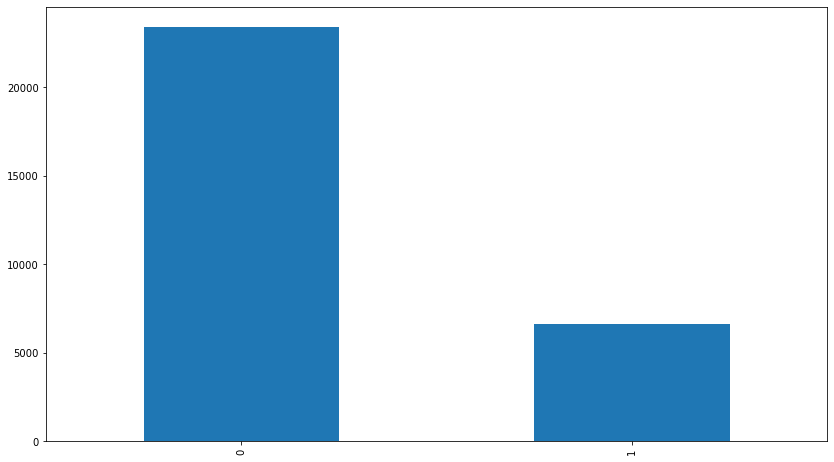

In [18]:
pd.value_counts(df['Default']).plot.bar()
#plt.title("Credit Card Default Counts")

In [20]:
#things to consider, are the 0's here for the actual amount or representing nan
print(df['PAY_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(df['PAY_AMT1'], ax=ax[0,0])
sns.distplot(df['PAY_AMT2'], ax=ax[0,1])
sns.distplot(df['PAY_AMT3'], ax=ax[0,2])
sns.distplot(df['PAY_AMT4'], ax=ax[1,0])
sns.distplot(df['PAY_AMT5'], ax=ax[1,1])
sns.distplot(df['PAY_AMT6'], ax=ax[1,2])
#plt.title("ADD TITLE")

0.0       5249
2000.0    1363
3000.0     891
5000.0     698
1500.0     507
Name: PAY_AMT1, dtype: int64


AttributeError: module 'matplotlib' has no attribute 'subplots'

In [5]:
print(df['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.countplot(x="PAY_0", data=df, ax=ax[0,0])
sns.countplot(x="PAY_2", data=df, ax=ax[0,1])
sns.countplot(x="PAY_3", data=df, ax=ax[0,2])
sns.countplot(x="PAY_4", data=df, ax=ax[1,0])
sns.countplot(x="PAY_5", data=df, ax=ax[1,1])
sns.countplot(x="PAY_6", data=df, ax=ax[1,2])

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


AttributeError: module 'matplotlib' has no attribute 'subplots'

AttributeError: module 'matplotlib' has no attribute 'title'

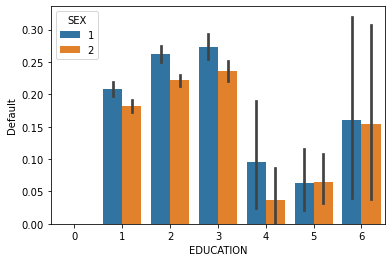

In [8]:
df['Default'].value_counts()
sns.barplot(x="EDUCATION", y="Default", hue="SEX", data=df)
plt.title("Default by Education and Sex")

In [21]:
import seaborn as sns
corr = df.corr()

In [22]:
corr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [7]:
import seaborn as sns
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [ ]:
as_category = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']

In [ ]:
labels = ['default']

In [ ]:
as_numeric = ['ID','LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6',
             'pay_over_time','total_no_cons','total_full_pay','revolve_credit']

In [ ]:
X = df.loc[:, df.columns != "Default"]
y = df.loc[:, df.columns == "Default"]

# RAW Variables

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

In [ ]:
y_train_hat = logreg.predict(X_train)
y_train_hat_probs = logreg.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')


In [ ]:
y_test_hat = logreg.predict(X_test)
y_test_hat_probs = logreg.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

#plt.savefig('auc_roc.png', dpi=600)

# Scaled Vars

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    return(train_scaled, test_scaled, y_train, y_test)

In [ ]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [ ]:
y_train_hat = logreg_result.predict(X_train_scaled)
y_train_hat_probs = logreg_result.predict_proba(X_train_scaled)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

# WOE & IV

Define a binning function for continuous independent variables

In [25]:
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)


Define a binning function for categorical independent variables

In [26]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [27]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [28]:
final_iv, IV = data_vars(df,df.Default)

Information Value

In [ ]:
final_iv

### Plotting the Weight of Evidence values 

In [29]:


data = [go.Bar(
            x=final_iv['VAR_NAME'],
            y=final_iv['WOE'],
            text=final_iv['VAR_NAME'],
            marker=dict(
            color='rgb(158,20,25)',
            line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]


layout = go.Layout(
    title='Weight of Evidence(WOE)',
        xaxis=dict(
        title='Features',
            tickangle=-45,
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Weight of Evidence(WOE)',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

plotly.offline.iplot({
    "data": data,'layout':layout
})

### Plotting the Information values 

In [30]:
data = [go.Bar(
            x=IV['VAR_NAME'],
            y=IV['IV'],
            text=IV['VAR_NAME'],
            marker=dict(
            color='rgb(58,256,225)',
            line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]


layout = go.Layout(
    title='Information Values',
        xaxis=dict(
        tickangle=-45,
        title='Features',
        tickfont=dict(
            size=10,
            color='rgb(7, 7, 7)'
        )
    ),
    yaxis=dict(
        title='Information Value(IV)',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

plotly.offline.iplot({
    "data": data,'layout':layout
})

In [ ]:
IV.sort_values('IV',ascending=False)

 From the above Information Value (IV) the following features are found to be good predictors have a strong relationship to the Goods/Bads odds ratio.
    
    VAR_NAME	IV
	PAY_3	0.409001
	PAY_4	0.355175
	PAY_5	0.329335
	PAY_6	0.281748
    LIMIT_BAL	0.175361
    PAY_AMT1	0.142889
    PAY_AMT2	0.128998
    PAY_AMT3	0.113012
    
    The below features are found to be suspicious in nature and too good to be true .
    VAR_NAME IV
    PAY_0	0.684208
	PAY_2	0.540881

In [ ]:
df.drop(['ID','PAY_0', 'PAY_2'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    return(train_scaled, test_scaled, y_train, y_test)

In [ ]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = logistic_regression(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

In [ ]:
y_train_hat = logreg_result.predict(X_train_scaled)
y_train_hat_probs = logreg_result.predict_proba(X_train_scaled)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

In [ ]:
y_test_hat = logreg_result.predict(X_test_scaled)
y_test_hat_probs = logreg_result.predict_proba(X_test_scaled)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

 Weight of Evidence(WOE) and Information Value(IV)

Weight of Evidence (WoE) describes the relationship between a predictor and a binary dependent variable. Information Value (IV) is the measurement of that relationship’s power. Based on its role, IV can be used as a base for attributes selection.
![](https://image.slidesharecdn.com/gcd-eda-190715044818/95/exploratory-data-analysis-on-german-credit-data-7-638.jpg?cb=1563166769)

Logistic regression model is one of the most commonly used statistical technique for solving binary classification problem. It is acceptable in almost all the domains. These two concepts - **weight of evidence (WOE)** and **information value (IV) **evolved from the same logistic regression technique. These two terms have been in existence in credit scoring world for more than 4-5 decades. They have been used as a benchmark to screen variables in the credit risk modeling projects such as **probability of default**. They help to explore data and screen variables. It is also used in marketing analytics project such as customer attrition model, campaign response model etc.

  <img src="https://i.imgur.com/5cKHNKJ.jpg">

### Weight of Evidence (WOE)

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

<img src="https://i.imgur.com/hrTnEXv.jpg">

Many people do not understand the terms goods/bads as they are from different background than the credit risk. It's good to understand the concept of WOE in terms of events and non-events. It is calculated by taking the natural logarithm (log to base e) of division of % of non-events and % of events.

<img src="https://i.imgur.com/dfosGgc.jpg">

WOE is typically used as part of the credit scorecard development .The development process consists of four main parts: variable transformations, model training using logistic regression, model validation, and scaling.

<img src="https://i.imgur.com/lbC7lfU.jpg">

### Variable Transformations

If you torture the data long enough, it will confess to anything. A standard scorecard model, based on logistic regression, is an additive model; hence, special variable transformations are required. The commonly adopted transformations – fine classing, coarse classing, and either dummy coding or weight of evidence (WOE) transformation – form a sequential process providing a model outcome that is both easy to implement and explain to the business. Additionally, these transformations assist in converting non-linear relationships between independent variables and the dependent variable into a linear relationship – the customer behaviour often requested by the business.

#### Fine classing

Applied to all continuous variables and those discrete variables with high cardinality. This is the process of initial binning into typically between 20 and 50 fine granular bins.

**To summarize create 10/20 bins/groups for a continuous independent variable and then calculates WOE and IV of the variable

#### Coarse classing

Where a binning process is applied to the fine granular bins to merge those with similar risk and create fewer bins, usually up to ten. The purpose is to achieve simplicity by creating fewer bins, each with distinctively different risk factors while minimising the information loss. However, to create a robust model that is resilient to overfitting, each bin should contain a sufficient number of observations from the total account (5% is the minimum recommended by most practitioners). These opposing goals can be achieved through an optimisation in the form of optimal binning that maximises a variable’s predictive power during the coarse classing process. Optimal binning utilises the same statistical measures used during variable selection, such as information value, Gini and chi-square statistics. The most popular measure is, again, information value, although combination of two or more measures is often beneficial. The missing values, if they contain predictive information, should be a separate class or merged to bin with similar risk factors.

**To summarize combine adjacent categories with similar WOE scores

#### Dummy coding

The process of creating binary (dummy) variables for all coarse classes except the reference class. This approach may present issues as the extra variables requires more memory and processing resources, and occasionally overfitting may arise because of the reduced degrees of freedom.

#### Weight of evidence (WOE) transformation

The alternative, more favoured, approach to dummy coding that substitutes each coarse class with a risk value, and in turn collapses the risk values into a single numeric variable. The numeric variable describes the relationship between an independent variable and a dependent variable. The WOE framework is well suited for logistic regression modelling as both are based on log-odds calculation. In addition, WOE transformation standardises all independent variables, hence, the parameters in a subsequent logistic regression can be directly compared. 

**Weight of Evidence (WOE)** helps to transform a continuous independent variable into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events.

**For continuous independent variables** : First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values and replace categories with WOE values. Use WOE values rather than input values in your model.

**For categorical independent variables** : Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values. In other words, use WOE values rather than raw categories in your model. The transformed variable will be a continuous variable with WOE values. It is same as any continuous variable.

#### Why combine categories with similar WOE?

It is because the categories with similar WOE have almost same proportion of events and non-events. In other words, the behavior of both the categories is same.

#### Rules related to WOE
- Each category (bin) should have at least 5% of the observations.
- Each category (bin) should be non-zero for both non-events and events.
- The WOE should be distinct for each category. Similar groups should be aggregated. 
- The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
- Missing values are binned separately.

#### Number of Bins (Groups)

In general, 10 or 20 bins are taken. Ideally, each bin should contain at least 5% cases. The number of bins determines the amount of smoothing - the fewer bins, the more smoothing. If someone asks you ' "why not to form 1000 bins?" The answer is the fewer bins capture important patterns in the data, while leaving out noise. Bins with less than 5% cases might not be a true picture of the data distribution and might lead to model instability.

#### Handle Zero Event/ Non-Event

If a particular bin contains no event or non-event, you can use the formula below to ignore missing WOE. We are adding 0.5 to the number of events and non-events in a group.

AdjustedWOE = ln (((Number of non-events in a group + 0.5) / Number of non-events)) / ((Number of events in a group + 0.5) / Number of events))


#### How to check correct binning with WOE

1. The WOE should be monotonic i.e. either growing or decreasing with the bins. You can plot WOE values and check linearity on the graph.

2. Perform the WOE transformation after binning. Next, we run logistic regression with 1 independent variable having WOE values. If the slope is not 1 or the intercept is not ln(% of non-events / % of events) then the binning algorithm is not good.

Both dummy coding and WOE transformation give the similar results. The choice which one to use mainly depends on personal preferences.

In general optimal binning, dummy coding and weight of evidence transformation are, when carried out manually, time-consuming processes. 

**WOE Advantage**:

The advantages of WOE transformation are

**1. Handles missing values**

**2. Handles outliers**

**3. The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function**

**4. No need for dummy variables**

**5. By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable**

**WOE Disadvantage**:

The  main disadvantage of WOE transformation is 

**-  in only considering the relative risk of each bin, without considering the proportion of accounts in each bin. The information value can be utilised instead to assess the relative contribution of each bin.**

### Information Value (IV)

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
  <img src="https://i.imgur.com/r6ACeFN.jpg">

  ** IV statistic in credit scoring can be interpreted as follows. **

<img src="https://i.imgur.com/cZx3taD.jpg">
 
If the IV statistic is:

- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
- 0.5, suspicious relationship (Check once)

#### Important Points

- Information value increases as bins / groups increases for an independent variable. We have to be careful when there are more than **20 bins** as some bins may have a very few number of events and non-events.

- Information value should not be used as a feature selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as it's designed for binary logistic regression model only.